## Setup: Working with the Database
**Install the needed libraries**


**Download and connect to the database file containing survey data.**


In [ ]:
# Step 1: Download the dataset
file_path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'

# Display the first few rows to understand the structure of the data

### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.



##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.



### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.



##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.


### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

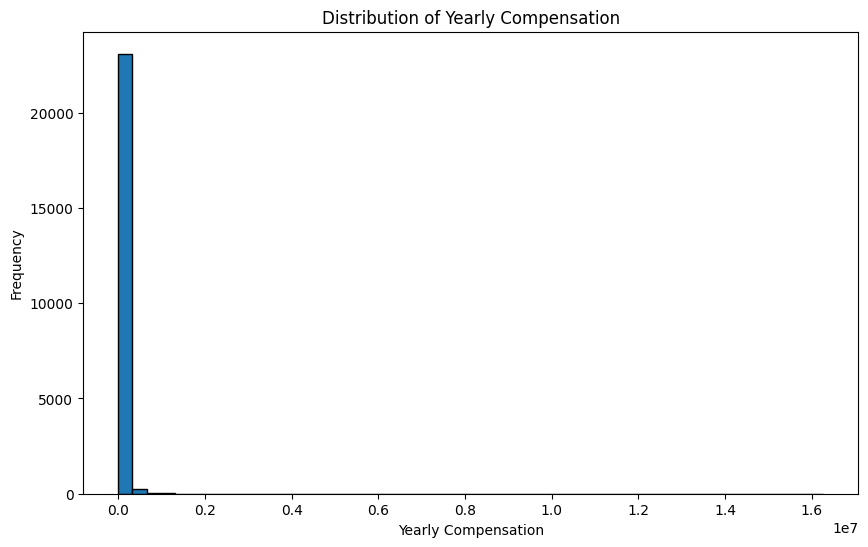

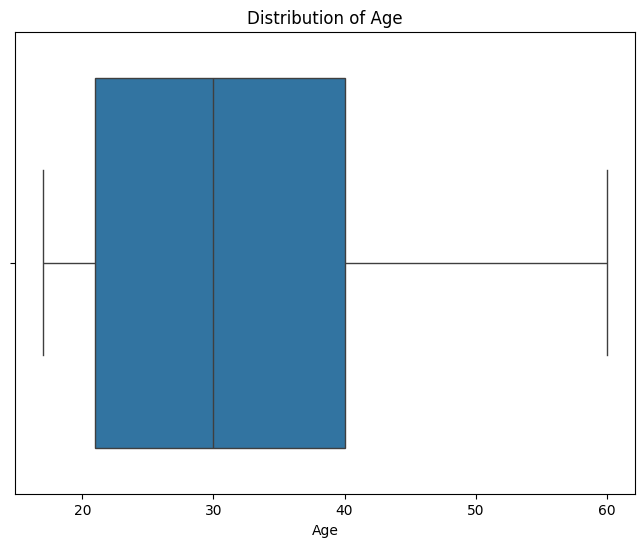

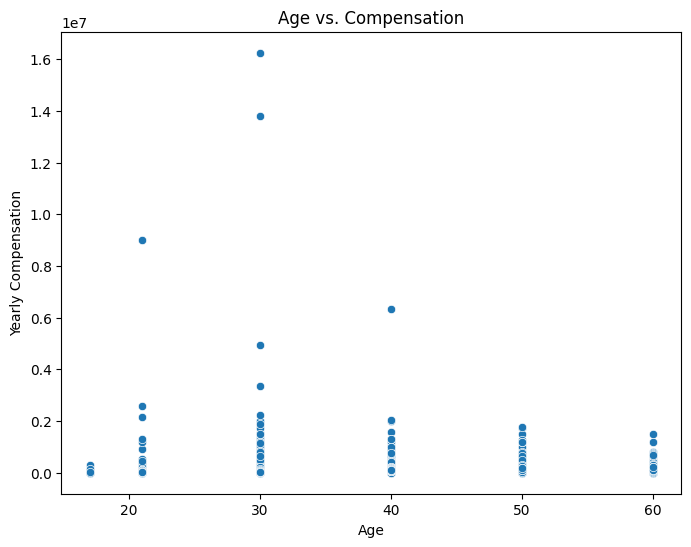

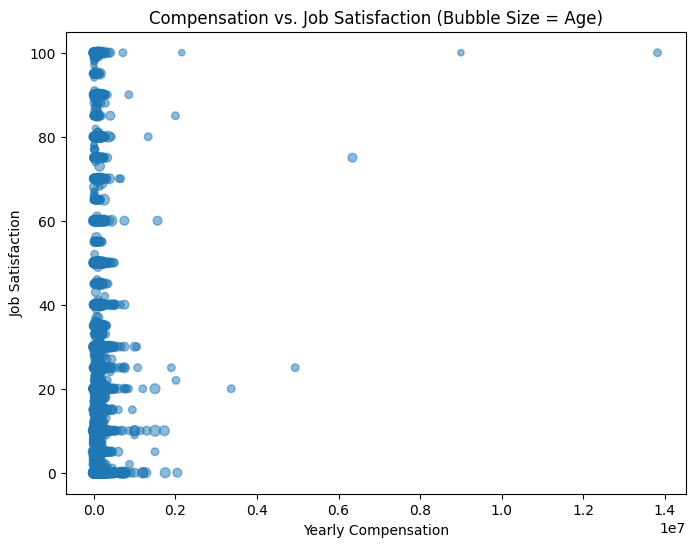

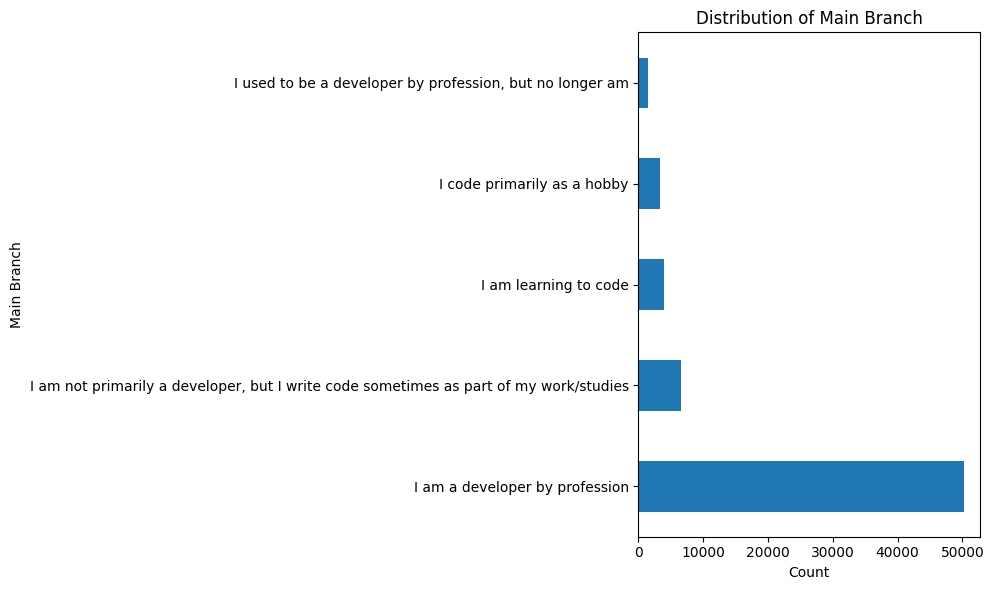

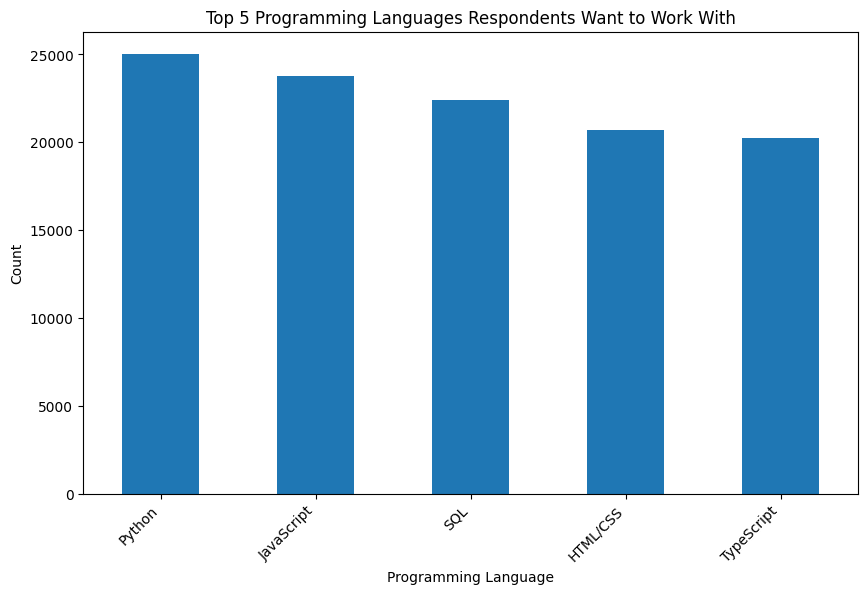

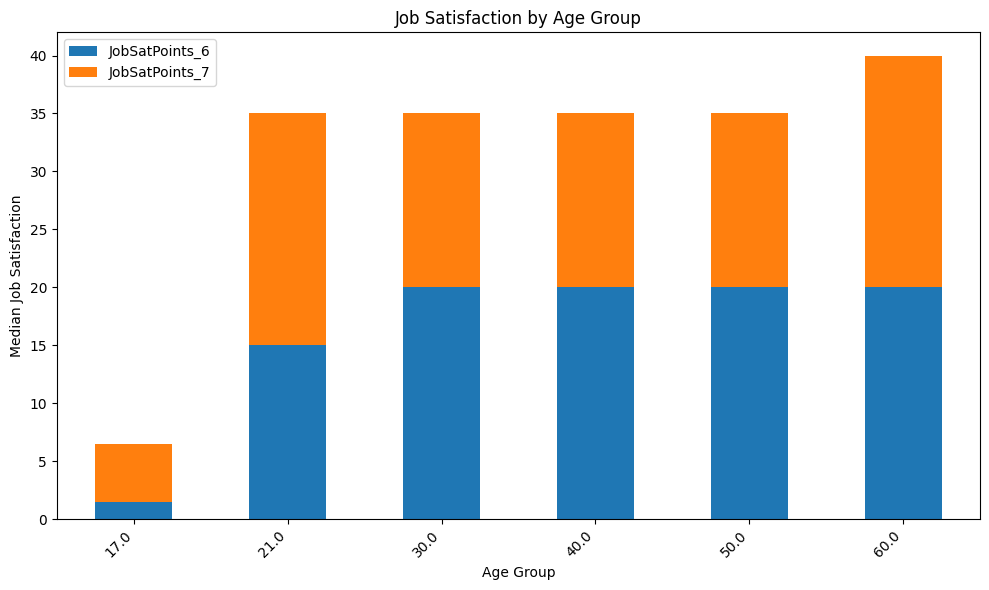

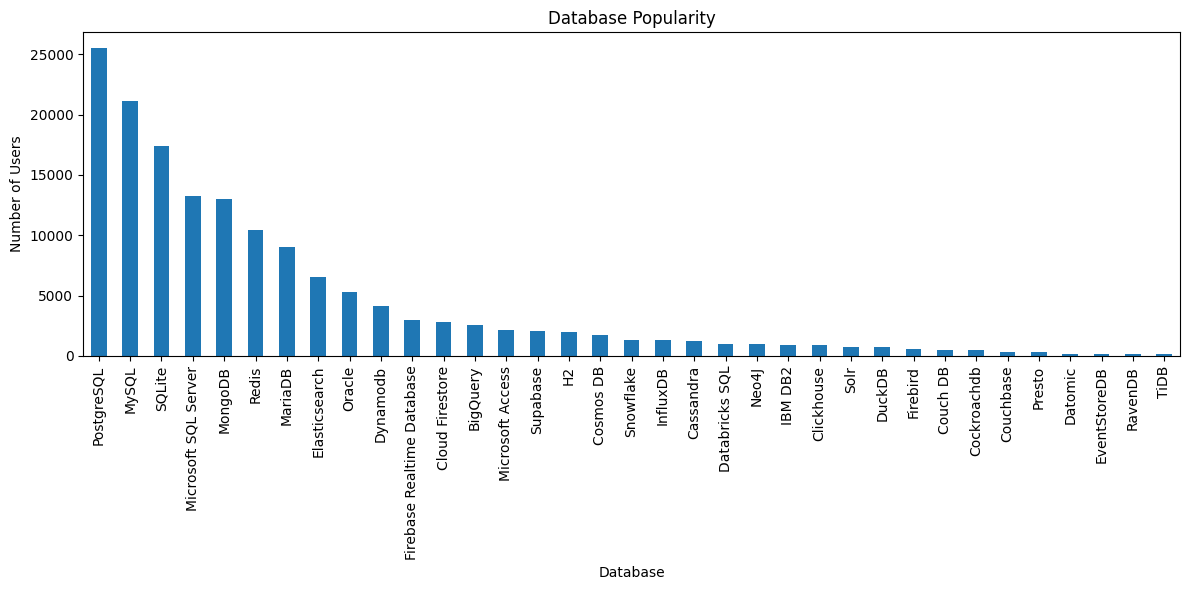

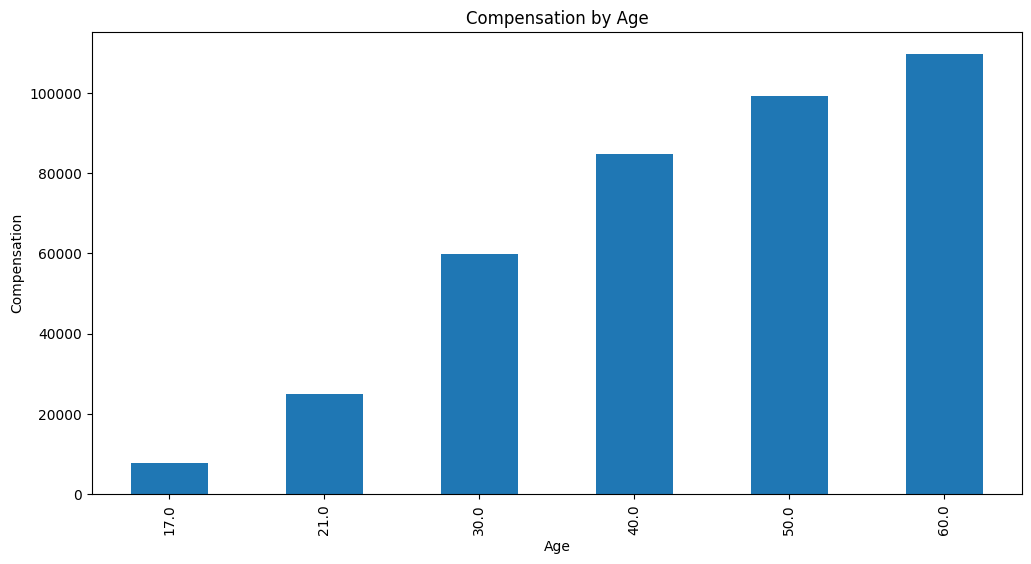

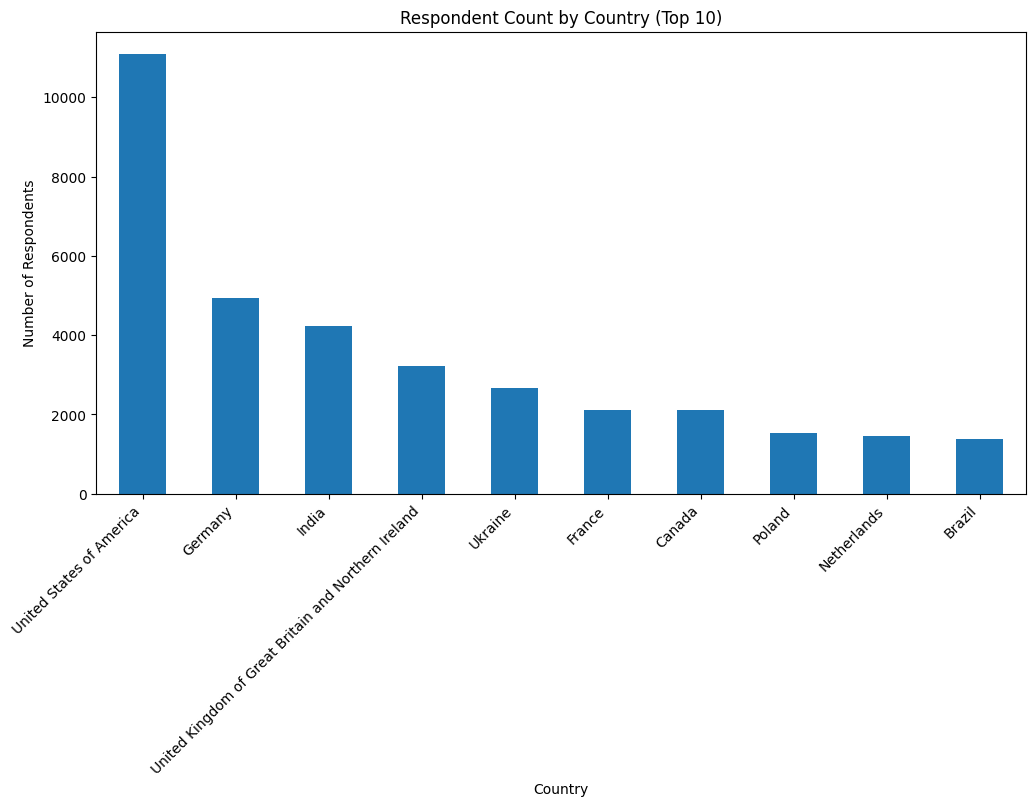

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def load_and_preprocess_data(file_path):
    """Loads and preprocesses the data."""
    df = pd.read_csv(file_path)

    # Convert 'Age' to numeric
    age_mapping = {  # Map age ranges to numerical midpoints
        'Under 18 years old': 17,
        '18-24 years old': 21,
        '25-34 years old': 30,
        '35-44 years old': 40,
        '45-54 years old': 50,
        '55-64 years old': 60,
        '65-74 years old': 70,
        '75 years or older': 75,
        'Prefer not to say': None  # Or handle differently if needed
    }
    df['AgeNumeric'] = df['Age'].map(age_mapping)

    # Convert other relevant columns to numeric
    for col in ['ConvertedCompYearly', 'JobSatPoints_6', 'JobSatPoints_7']:
        df[col] = pd.to_numeric(df[col], errors='coerce')  # Handle errors gracefully

    return df

# Load and preprocess data
file_path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = load_and_preprocess_data(file_path)


# Display first few rows
print(df.head())

def create_stacked_chart(data, title, xlabel, ylabel):
    """Creates a stacked chart."""
    data.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Task 1: Data Distributions
# 1. Histogram of ConvertedCompYearly
plt.figure(figsize=(10, 6))
plt.hist(df['ConvertedCompYearly'].dropna(), bins=50, edgecolor='black') # Drop NaN values for histogram
plt.title('Distribution of Yearly Compensation')
plt.xlabel('Yearly Compensation')
plt.ylabel('Frequency')
plt.show()


# 2. Box Plot of Age (after conversion)
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['AgeNumeric'])
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.show()



# Task 2: Relationships
# 1. Scatter Plot of Age and Compensation
plt.figure(figsize=(8, 6))
sns.scatterplot(x='AgeNumeric', y='ConvertedCompYearly', data=df)
plt.title('Age vs. Compensation')
plt.xlabel('Age')
plt.ylabel('Yearly Compensation')
plt.show()

# 2. Bubble Plot (with AgeNumeric as bubble size)
plt.figure(figsize=(8, 6))
plt.scatter(df['ConvertedCompYearly'], df['JobSatPoints_6'], s=df['AgeNumeric'], alpha=0.5)  # Age as bubble size
plt.title('Compensation vs. Job Satisfaction (Bubble Size = Age)')
plt.xlabel('Yearly Compensation')
plt.ylabel('Job Satisfaction')
plt.show()



# Task 3: Composition
# 1. Horizontal Bar Chart of MainBranch
plt.figure(figsize=(10, 6))
df['MainBranch'].value_counts().plot(kind='barh')
plt.title('Distribution of Main Branch')
plt.xlabel('Count')
plt.ylabel('Main Branch')
plt.tight_layout()  # Adjust layout to fit horizontal labels
plt.show()




# 2. Vertical Bar Chart of Top 5 Languages
top_languages = df['LanguageWantToWorkWith'].str.split(';', expand=True).stack().value_counts().nlargest(5)

plt.figure(figsize=(10, 6))
top_languages.plot(kind='bar')
plt.title('Top 5 Programming Languages Respondents Want to Work With')
plt.xlabel('Programming Language')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.show()




# 3. Stacked Bar Chart of JobSat by Age Group
age_jobsat = df.groupby('AgeNumeric')[['JobSatPoints_6', 'JobSatPoints_7']].median() # Calculating the median values
create_stacked_chart(age_jobsat, 'Job Satisfaction by Age Group', 'Age Group', 'Median Job Satisfaction')


# 4. Bar Chart of Database Popularity
database_popularity = df['DatabaseHaveWorkedWith'].str.split(';', expand=True).stack().value_counts()
plt.figure(figsize=(12, 6))
database_popularity.plot(kind='bar')
plt.title('Database Popularity')
plt.xlabel('Database')
plt.ylabel('Number of Users')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# Task 4: Comparison
# 1. Grouped Bar Chart of Median Compensation by Age Group

median_comp_age = df.groupby("AgeNumeric")['ConvertedCompYearly'].median()
plt.figure(figsize=(12,6))
median_comp_age.plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Compensation')
plt.title('Compensation by Age')
plt.show()


# 2. Bar Chart of Respondent Count by Country (Top 10 for better visualization)
top_countries = df['Country'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
top_countries.plot(kind='bar')
plt.title('Respondent Count by Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.show()